In [1]:
import os

# define repo name and get root working directory
repo = 'gla'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\gla'

In [2]:
import re
import pandas as pd
from datetime import datetime

def getFrame( filename ):

    # read
    df = pd.read_csv( filename, names=[ 'scene' ] )

    aos = []; tiles = []
    for idx, row in df.iterrows():

        # strip name and retrieve datetime
        m = re.search( '_[0-9]{15}_', row[ 'scene' ] )
        if m:
            value =  str(m.group(0) ).strip( '_' )
            aos.append( datetime.strptime( str( value ), '%Y%m%d%H%M%S%f') )

        # strip name and retrieve tile
        m = re.search( '_[E|W][\d]{3}[N|S][\d]{2}_', row[ 'scene' ] )
        if m:
            value =  str(m.group(0) ).strip( '_' )
            tiles.append(  value )

    # add columns
    df['aos'] = aos
    df['tile'] = tiles

    return df

# Pleiades SSGP Dataset Catalogue

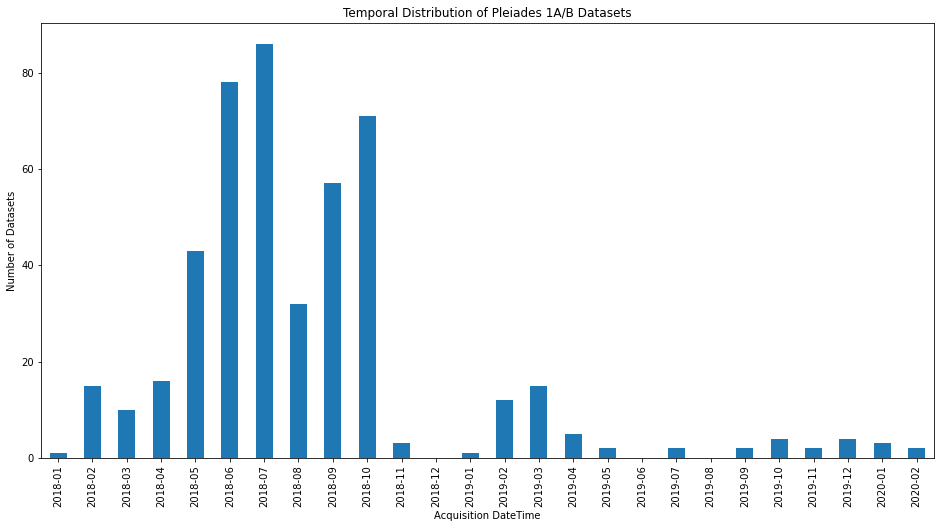

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# read file into frame
pathname = os.path.join( root_path, 'data/ssgp/pleiades.txt' )
df = getFrame( pathname )

# bin aos datetimes into monthly bins
hist=df.groupby(pd.Grouper(key='aos', freq='1M')).count()
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), title='Temporal Distribution of Pleiades 1A/B Datasets' )

# plot histogram
ax.set_xticklabels( [ np.datetime_as_string(t, unit='M') for t in hist.index.values ], rotation=90)
ax.set_xlabel( 'Acquisition DateTime' )
ax.set_ylabel( 'Number of Datasets' )
plt.show()


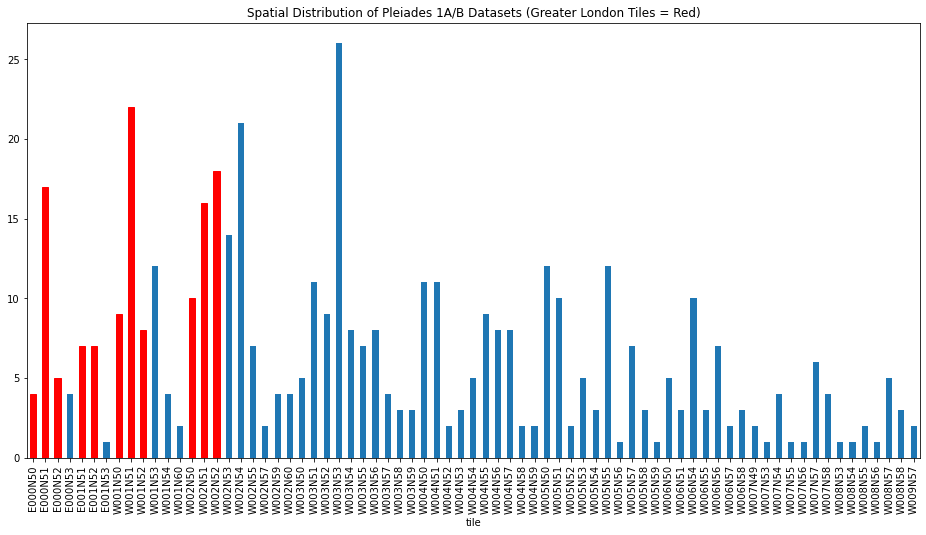

In [4]:
# sort frame according to tile
df.sort_values(by=['tile'], inplace=True)
hist=df.groupby(pd.Grouper(key='tile')).count()

# plot counts per tile
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), 
                   title='Spatial Distribution of Pleiades 1A/B Datasets (Greater London Tiles = Red)' )
ax.set_xticklabels( hist.index.values, rotation=90 )
bars=list( filter(lambda x: isinstance(x, matplotlib.patches.Rectangle), ax.get_children() ) )

# get tiles coincident with Greater London region
london_tiles = []
for lon in range ( 0, 3 ):
    for lat in range ( 50, 53 ):        
        london_tiles.append( 'E{:03d}N{}'.format( lon, lat ) )
        london_tiles.append( 'W{:03d}N{}'.format( lon, lat ) )

# colourise London specific tiles
for idx, value in enumerate ( hist.index.values ):
    if value in london_tiles:
        bars[ idx ].set_color('r')

plt.show()

In [5]:
# print stats
london_hist = hist.loc[ hist.index.intersection( london_tiles ) ] 
print ( 'SSGP Pleiades 1A/B Datasets covering Greater London region: {}'.format( sum( london_hist[ 'scene' ] ) ) )
print ( 'Total SSGP Pleiades Datasets: {}'.format( sum( hist[ 'scene' ] ) ) )

SSGP Pleiades 1A/B Datasets covering Greater London region: 123
Total SSGP Pleiades Datasets: 466


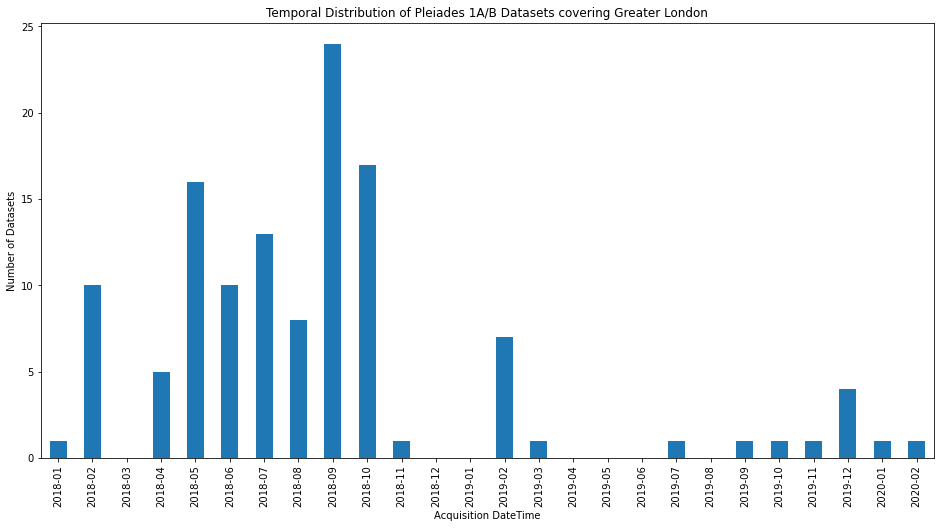

In [6]:
# bin London-specific aos datetimes into monthly bins
df = df.loc[df['tile'].isin(london_tiles)]
hist=df.groupby(pd.Grouper(key='aos', freq='1M')).count()
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), title='Temporal Distribution of Pleiades 1A/B Datasets covering Greater London' )

# plot histogram
ax.set_xticklabels( [ np.datetime_as_string(t, unit='M') for t in hist.index.values ], rotation=90)
ax.set_xlabel( 'Acquisition DateTime' )
ax.set_ylabel( 'Number of Datasets' )
plt.show()


# SPOT SSGP Dataset Catalogue

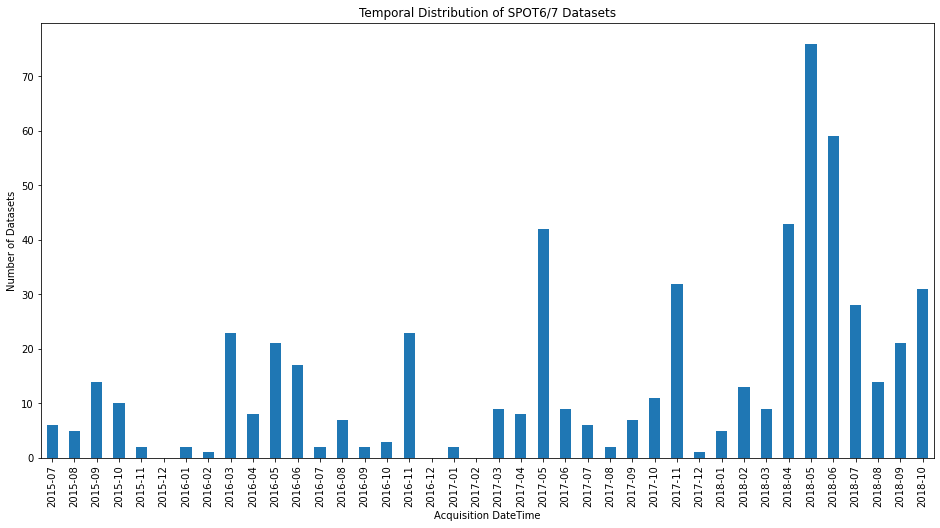

In [7]:
# read file into frame
pathname = os.path.join( root_path, 'data/ssgp/spot.txt' )
df = getFrame( pathname )

# bin aos datetimes into monthly bins
hist=df.groupby(pd.Grouper(key='aos', freq='1M')).count()
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), title='Temporal Distribution of SPOT6/7 Datasets' )

# plot histogram
ax.set_xticklabels( [ np.datetime_as_string(t, unit='M') for t in hist.index.values ], rotation=90)
ax.set_xlabel( 'Acquisition DateTime' )
ax.set_ylabel( 'Number of Datasets' )
plt.show()

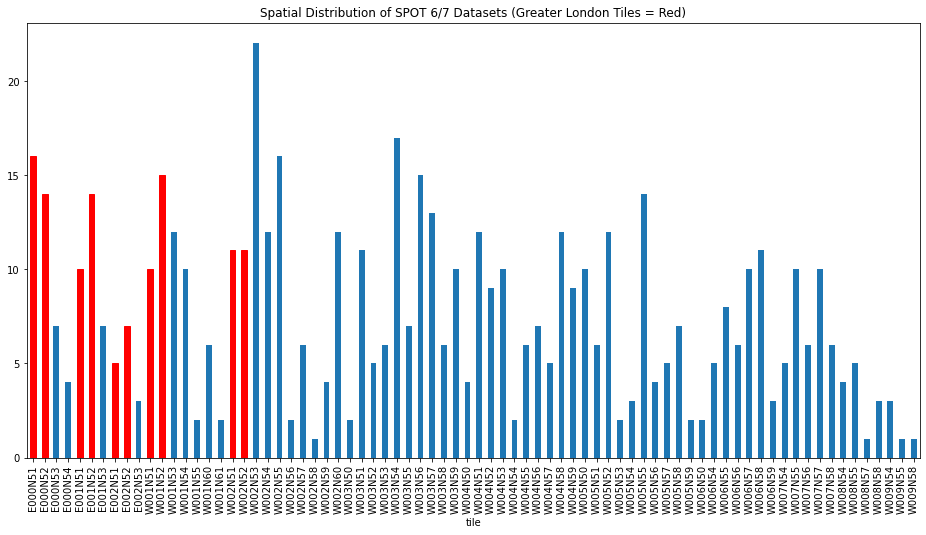

In [8]:
# sort frame according to tile
df.sort_values(by=['tile'], inplace=True)
hist=df.groupby(pd.Grouper(key='tile')).count()

# plot counts per tile
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), 
                   title='Spatial Distribution of SPOT 6/7 Datasets (Greater London Tiles = Red)' )
ax.set_xticklabels( hist.index.values, rotation=90 )
bars=list( filter(lambda x: isinstance(x, matplotlib.patches.Rectangle), ax.get_children() ) )

# get tiles coincident with Greater London region
london_tiles = []
for lon in range ( 0, 3 ):
    for lat in range ( 50, 53 ):        
        london_tiles.append( 'E{:03d}N{}'.format( lon, lat ) )
        london_tiles.append( 'W{:03d}N{}'.format( lon, lat ) )

# colourise London specific tiles
for idx, value in enumerate ( hist.index.values ):
    if value in london_tiles:
        bars[ idx ].set_color('r')

plt.show()

In [9]:
# print stats
london_hist = hist.loc[ hist.index.intersection( london_tiles ) ] 
print ( 'SSGP SPOT 6/7 Datasets covering Greater London region: {}'.format( sum( london_hist[ 'scene' ] ) ) )
print ( 'Total SSGP SPOT 6/7 Datasets: {}'.format( sum( hist[ 'scene' ] ) ) )

SSGP SPOT 6/7 Datasets covering Greater London region: 113
Total SSGP SPOT 6/7 Datasets: 574


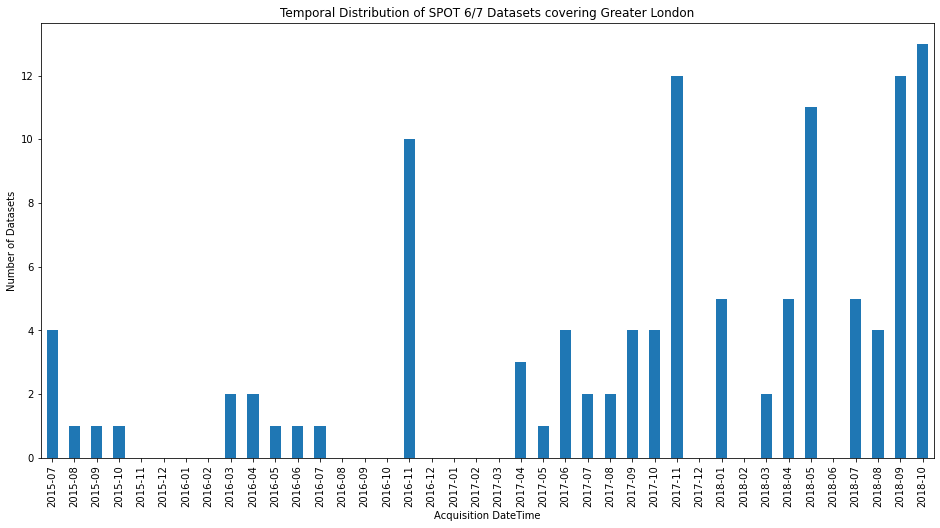

In [10]:
# bin London-specific aos datetimes into monthly bins
df = df.loc[df['tile'].isin(london_tiles)]
hist=df.groupby(pd.Grouper(key='aos', freq='1M')).count()
ax = hist.plot( kind='bar', y='scene', legend=False, figsize=(16,8), title='Temporal Distribution of SPOT 6/7 Datasets covering Greater London' )

# plot histogram
ax.set_xticklabels( [ np.datetime_as_string(t, unit='M') for t in hist.index.values ], rotation=90)
ax.set_xlabel( 'Acquisition DateTime' )
ax.set_ylabel( 'Number of Datasets' )
plt.show()